In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The delivery_time.csv dataset contains information about Delivery time and Sorting Time.
We have to prepare linear regression and polynimial regression model to predict Sorting 
time on the basis of Delivery Time. Also evaluate the model by using evaluation metrics.

In [160]:
df = pd.read_csv("delivery_time.csv")

In [161]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [162]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [164]:
df['Sorting Time'].value_counts()

Sorting Time
7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: count, dtype: int64

<Axes: >

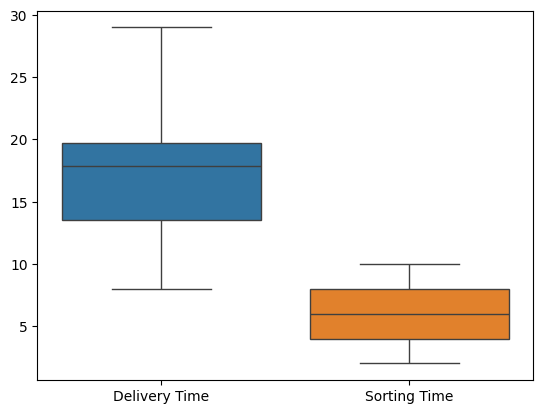

In [165]:
sns.boxplot(df)

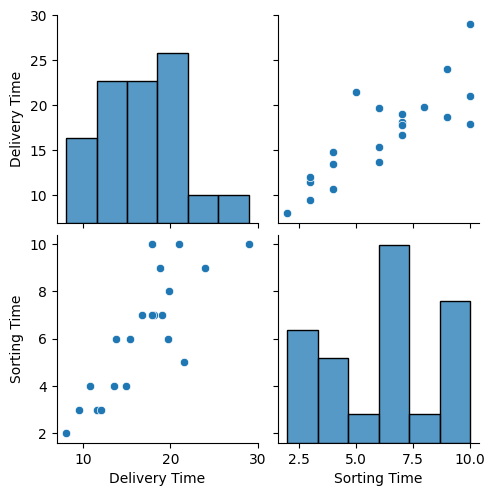

In [166]:
sns.pairplot(df)

In [167]:
x = df.drop('Sorting Time', axis=1)
y = df['Sorting Time']

In [168]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
x = poly.fit_transform(x)

In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=123456)

In [170]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [171]:
model.coef_

array([ 0.00000000e+00, -5.07136597e+00,  4.89850466e-01, -1.75083771e-02,
        2.15257558e-04])

In [172]:
model.intercept_

np.float64(19.780472798351965)

In [173]:
y_pred = model.predict(x_test)
y_true = y_test

In [174]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
r2

-0.267176655523941

In [178]:
predictions = model.predict(x)

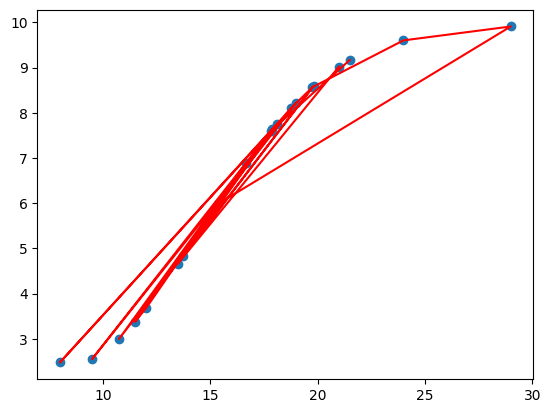

In [177]:
plt.scatter(df['Delivery Time'],predictions)
plt.plot(df['Delivery Time'], predictions, color="red")